# 호텔 예약 취소 원인 분석



## Q. 호텔 예약 취소와 어떤 요인이 상관관계가 있을까?



### 1. 데이터 전처리

1-1. 변수 열 제거

1-2. NaN 값 처리

1-3. 데이터 분석

### 2. 데이터 시각화

2-1. 호텔 종류에 따른 취소 횟수

2-2. 월별 취소율 비교

2-3. 숙박 전 예약기간에 따른 취소율 비교

2-4. 예치금 부과 방식에 따른 취소율 비교

2-5. 요금별 취소율 비교


### 3. 결론






In [150]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import numpy.random as random
import scipy as sp
import scipy.stats as stats


import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


%matplotlib inline


%precision 3


sns.set(color_codes=True)

import warnings
warnings.filterwarnings('ignore')

In [151]:
data=pd.read_csv('hotel_bookings.csv')

In [152]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## 1. 데이터 전처리

### 1-1. 변수 열 제거

In [153]:
print(data.shape)

(119390, 32)


In [154]:
data=data.drop(['agent','company','country','days_in_waiting_list','required_car_parking_spaces'],axis=1)

In [155]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,customer_type,adr,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,C,C,3,No Deposit,Transient,0.00,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,C,C,4,No Deposit,Transient,0.00,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,A,C,0,No Deposit,Transient,75.00,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,A,A,0,No Deposit,Transient,75.00,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,A,A,0,No Deposit,Transient,98.00,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,A,A,0,No Deposit,Transient,96.14,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,E,E,0,No Deposit,Transient,225.43,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,D,D,0,No Deposit,Transient,157.71,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,A,A,0,No Deposit,Transient,104.40,0,Check-Out,2017-09-07


### 1-2. NaN값 처리

In [156]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
customer_type                     0
adr                               0
total_of_special_requests         0
reservation_status                0
reservation_status_date           0
dtype: int64

### 1-3. 데이터 분석

In [157]:
# 취소 횟수 
print(data.is_canceled.value_counts())

0    75166
1    44224
Name: is_canceled, dtype: int64


In [158]:
#취소 비율

print(data.is_canceled.value_counts(normalize=True))

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64


In [159]:
#양의 상관계수를 가지는 변수들 추출

data_corr = data.corr()
data_corr
data_corr.loc[data_corr['is_canceled'] > 0,"is_canceled"]

is_canceled                 1.000000
lead_time                   0.293123
arrival_date_year           0.016660
arrival_date_week_number    0.008148
stays_in_week_nights        0.024765
adults                      0.060017
children                    0.005048
previous_cancellations      0.110133
adr                         0.047557
Name: is_canceled, dtype: float64

## 2. 데이터 시각화

### 2-1. 호텔 종류에 따른 취소 횟수



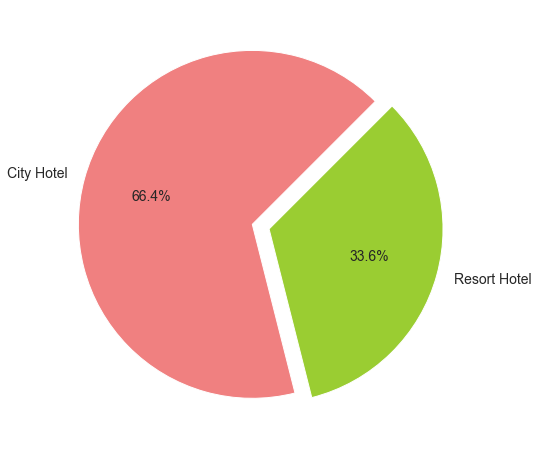

In [170]:
#city hotel 및 resort hotel 표본 크기 비교

labels = data['hotel'].value_counts().index.tolist()

sizes = data['hotel'].value_counts().tolist()

explode = (0, 0.1)

colors = ['lightcoral', 'yellowgreen']

plt.pie(sizes, explode=explode, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=45,textprops={'fontsize': 14})
plt.show()

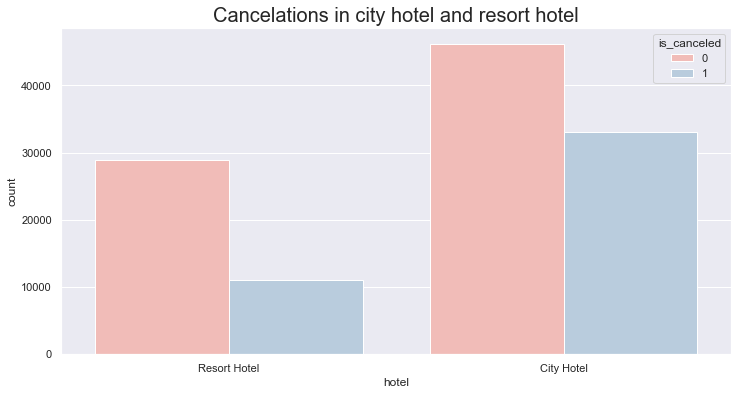

In [161]:
plt.figure(figsize=(12,6))
sns.countplot(x='hotel', hue='is_canceled', data= data, palette='Pastel1')
plt.title("Cancelations in city hotel and resort hotel",fontsize=20)
plt.show()

city hotel 표본 크기가 resort hotel 보다 크고, 두 집단 중 city hotel의 취소율이 더 높았다.

## 2-2. 월별 취소율 비교




In [16]:
#city hotel과 resort hotel 취소율 계산

res_book_per_month = data.loc[(data["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
res_cancel_per_month = data.loc[(data["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

cit_book_per_month = data.loc[(data["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
cit_cancel_per_month = data.loc[(data["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

res_cancel_data = pd.DataFrame({"Hotel": "Resort Hotel",
                                "Month": list(res_book_per_month.index),
                                "Bookings": list(res_book_per_month.values),
                                "Cancelations": list(res_cancel_per_month.values)})
cit_cancel_data = pd.DataFrame({"Hotel": "City Hotel",
                                "Month": list(cit_book_per_month.index),
                                "Bookings": list(cit_book_per_month.values),
                                "Cancelations": list(cit_cancel_per_month.values)})

cancel_data = pd.concat([res_cancel_data, cit_cancel_data], ignore_index=True)
cancel_data["cancel_percent"] = cancel_data["Cancelations"] / cancel_data["Bookings"] * 100

cancel_data


,Hotel,Month,Bookings,Cancelations,cancel_percent
0,Resort Hotel,April,3609,1059,29.343308
1,Resort Hotel,August,4894,1637,33.449121
2,Resort Hotel,December,2648,631,23.829305
3,Resort Hotel,February,3103,795,25.620367
4,Resort Hotel,January,2193,325,14.819881
5,Resort Hotel,July,4573,1436,31.401706
6,Resort Hotel,June,3045,1007,33.070608
7,Resort Hotel,March,3336,763,22.871703
8,Resort Hotel,May,3559,1024,28.772127
9,Resort Hotel,November,2437,461,18.916701


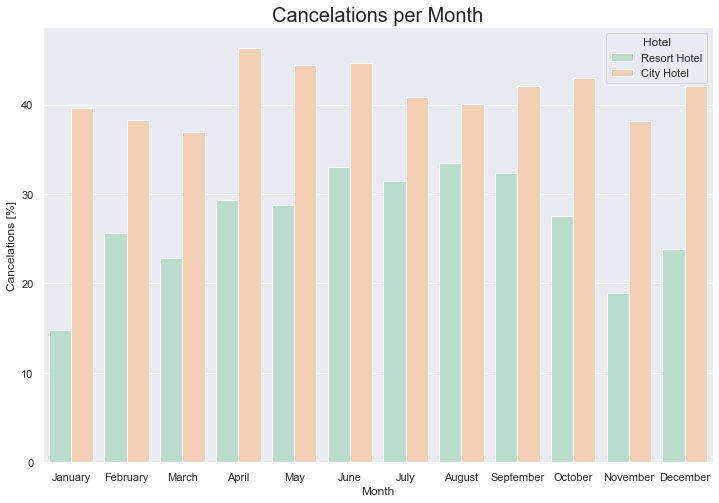

In [149]:
#월별 순서 정리

months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
cancel_data["Month"] = pd.Categorical(cancel_data["Month"], categories=months, ordered=True)

#graph 작성

plt.figure(figsize=(12, 8))
sns.barplot(x = "Month", y = "cancel_percent" , hue="Hotel",
            hue_order = ["Resort Hotel", "City Hotel"], data=cancel_data,palette='Pastel2')
plt.title("Cancelations per Month",fontsize=20)
plt.xlabel("Month")
plt.ylabel("Cancelations [%]")
plt.show()

resort hotel의 경우, 6-8월의 취소율이 높았고 city hotel의 경우 4~6월의 취소율이 높았다.

## 2-3. 숙박 전 예약기간에 따른 취소율 비교

In [24]:
lead_cancel_data = data.groupby("lead_time")["is_canceled"].describe()

lead_cancel_data

,count,mean,std,min,25%,50%,75%,max
lead_time,,,,,,,,
0,6345.0,0.067770,0.251370,0.0,0.0,0.0,0.0,1.0
1,3460.0,0.092775,0.290158,0.0,0.0,0.0,0.0,1.0
2,2069.0,0.102948,0.303965,0.0,0.0,0.0,0.0,1.0
3,1816.0,0.100220,0.300376,0.0,0.0,0.0,0.0,1.0
4,1715.0,0.102624,0.303556,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
622,17.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
626,30.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
629,17.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


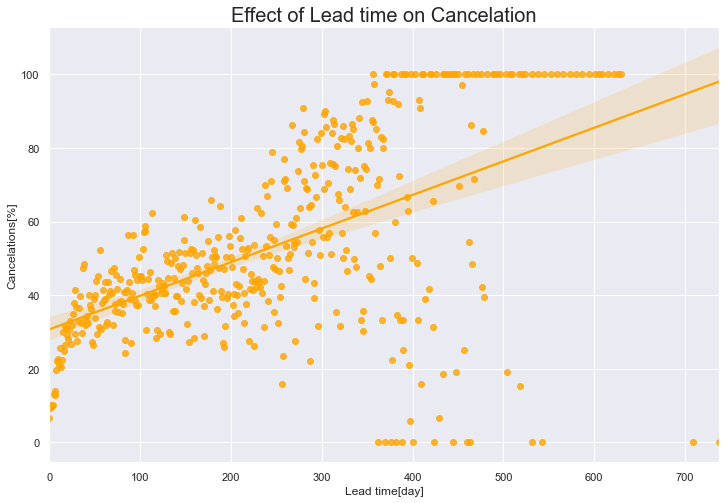

In [81]:
plt.figure(figsize=(12, 8))
sns.regplot(x=lead_cancel_data.index, y=lead_cancel_data["mean"].values * 100, color = "orange")
plt.title("Effect of Lead time on Cancelation", fontsize=20)
plt.xlabel("Lead time[day]")
plt.ylabel("Cancelations[%]" )

plt.show()

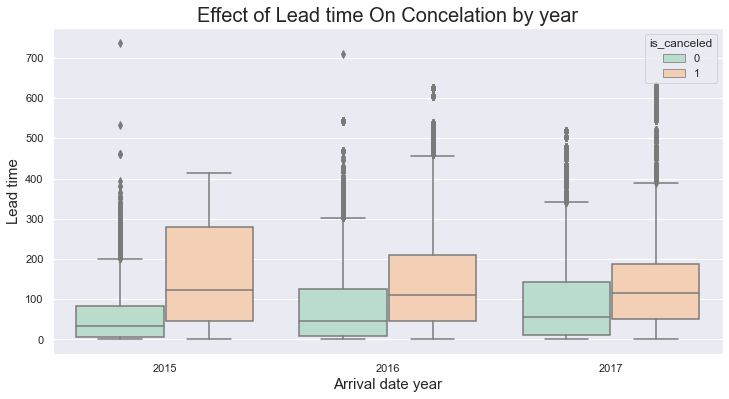

In [112]:
plt.figure(figsize=(12,6))
sns.boxplot(x='arrival_date_year', y='lead_time',hue='is_canceled', data= data, palette='Pastel2')
plt.title("Effect of Lead time On Concelation by year",fontsize=20)
plt.xlabel("Arrival date year",fontsize=15)
plt.ylabel("Lead time",fontsize=15)
plt.show()

예약을 취소하는 경우, 실제 숙박 전 예약기간이 평균적으로 더 길었음을 알 수 있다. 

## 2-4. 예치금 부과 방식에 따른 취소율 비교



In [66]:
deposit_cancel_data = data.groupby("deposit_type")["is_canceled"].describe()

deposit_cancel_data

,count,mean,std,min,25%,50%,75%,max
deposit_type,,,,,,,,
No Deposit,104641.0,0.283770,0.450829,0.0,0.0,0.0,1.0,1.0
Non Refund,14587.0,0.993624,0.079595,0.0,1.0,1.0,1.0,1.0
Refundable,162.0,0.222222,0.417029,0.0,0.0,0.0,0.0,1.0


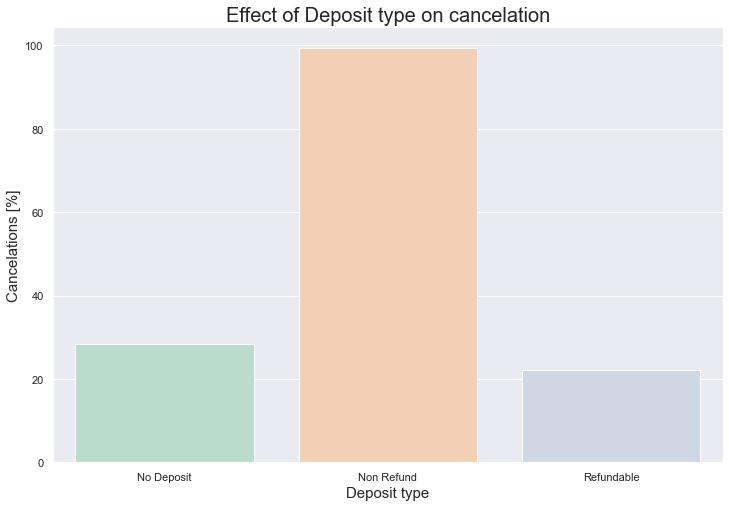

In [75]:
plt.figure(figsize=(12, 8))
sns.barplot(x=deposit_cancel_data.index, y=deposit_cancel_data["mean"] * 100,palette = "Pastel2")
plt.title("Effect of Deposit type on cancelation",fontsize=20)
plt.xlabel("Deposit type",fontsize=15)
plt.ylabel("Cancelations [%]",fontsize=15)
plt.show()


In [123]:
deposit_data=data.groupby("deposit_type")['lead_time','previous_cancellations','is_repeated_guest'].mean()
deposit_data

,lead_time,previous_cancellations,is_repeated_guest
deposit_type,,,
No Deposit,88.756615,0.042039,0.035760
Non Refund,212.908891,0.411462,0.004387
Refundable,152.098765,0.000000,0.024691


예치금이 환불되지 않는 경우, 가장 취소율이 높았다.

상식적으로 생각하기에 예치금이 환불가능하거나 아예 예치금이 없는 경우가 취소율이 

높을 것으로 예상했었는데 의외의 결과가 나왔다.
 




예치금 부과 방식에 따라 숙박 전 예약기간, 예약 취소 횟수, 방문 횟수를 비교해보니

예치금이 환불되지 않는 상품의 경우, 숙박 전 예약 기간이 다른 경우에 비해 2-3배가 차이가 났고,

이전 예약 취소 경험이 0.4번 정도로 가장 높았으며,

이전 방문 횟수는 다른 두 경우에 비해 가장 낮았다. 

## 2-5. 요금별 취소율 비교

In [171]:
adr_cancel_data = data.groupby("adr")["is_canceled"].describe()

adr_cancel_data 



,count,mean,std,min,25%,50%,75%,max
adr,,,,,,,,
-6.38,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
0.00,1959.0,0.108729,0.311378,0.0,0.0,0.0,0.0,1.0
0.26,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
0.50,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
1.00,15.0,0.200000,0.414039,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
450.00,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
451.50,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
508.00,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0


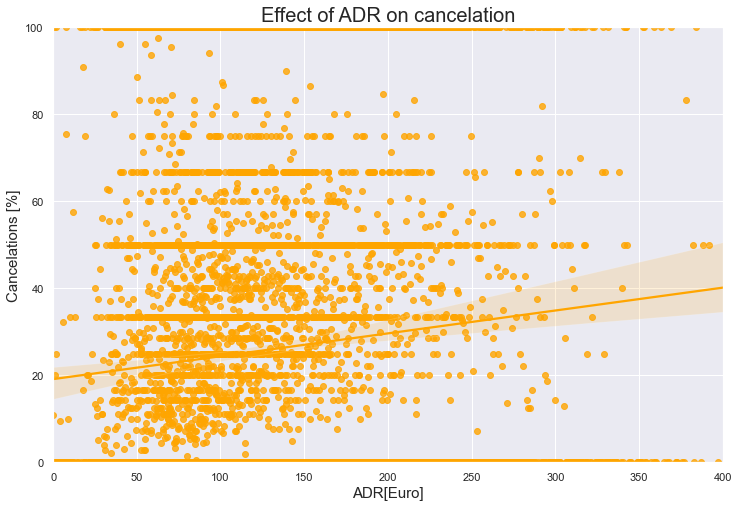

In [172]:
plt.figure(figsize=(12, 8))
sns.regplot(x=adr_cancel_data.index, y=adr_cancel_data["mean"].values * 100, color = 'orange')
plt.title("Effect of ADR on cancelation", fontsize=20)
plt.xlabel("ADR[Euro]", fontsize=15)
plt.ylabel("Cancelations [%]", fontsize=15)
plt.xlim(0,400)
plt.ylim(0,100)

plt.show()

일일 평균 요금과 취소율이 양의 상관계수를 가지는 것을 볼 수 있다. 

## 결론





* hotel의 종류가 도심지에 위치할수록 취소율이 높다.




* 휴양지에 위치한 호텔은 여름에, 도심지에 위치한 호텔은 봄~초여름에 취소율이 높다.





* 숙박 전 예약기간이 길수록 취소율이 높다.





* deposit 부과 방식 중 환불이 안되는 경우가 취소율이 높다.





* 일일 평균 요금을 많이 낼수록 취소율이 높다. 